Simulating for n=5 with 100000 trials...
Simulating for n=10 with 100000 trials...
Simulating for n=100 with 100000 trials...
Simulating for n=1000 with 10000 trials...
Simulating for n=10000 with 1000 trials...

Comparison of Empirical Frequencies
         5       10      100    1000     10000  Poisson(1)
0  0.36753  0.36583  0.36706  0.3744  0.367879     0.36788
1  0.37377  0.36786  0.36963  0.3656  0.367879     0.36788
2  0.16793  0.18583   0.1837  0.1798   0.18394     0.18394
3   0.0824  0.06069  0.06099  0.0603  0.061313     0.06131
4      0.0   0.0159  0.01516  0.0168  0.015328     0.01533
5  0.00837  0.00325  0.00284  0.0025  0.003066     0.00307
6      0.0  0.00055  0.00046  0.0005  0.000511     0.00051
TV Distance for n=5: 0.06448
TV Distance for n=10: 0.00538
TV Distance for n=100: 0.00358
TV Distance for n=1000: 0.01600
TV Distance for n=10000: 0.00000


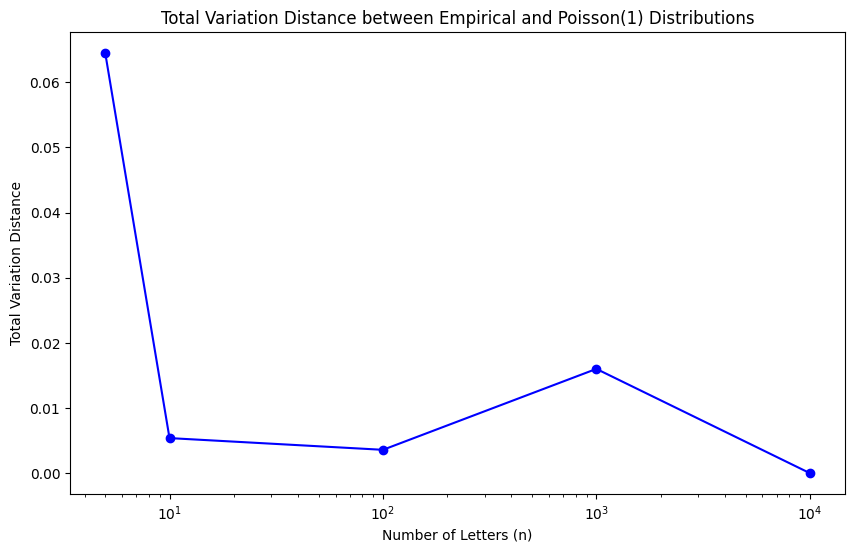

In [4]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def poisson_pmf(k, lam=1):
    """
    Computes the Poisson PMF for a given k and lambda.
    """
    return (math.exp(-lam) * lam**k) / math.factorial(k)

def simulate_fixed_points(n, trials):

    freq_counts = {k: 0 for k in range(7)}
    
    # Generate a list of indices once to avoid repeated list creations
    original = list(range(n))
    
    for _ in range(trials):
        perm = original.copy()
        random.shuffle(perm)
        fixed = sum(1 for i in range(n) if perm[i] == i)
        if fixed <= 6:
            freq_counts[fixed] += 1
        else:
            # For the table, we ignore k > 6 - use else pass to make the code faster by about 10%
            pass
    
    # Convert counts to frequencies
    freq = {}
    for k in range(7):
        freq[k] = freq_counts[k] / trials
    
    return freq

def total_variation_distance(empirical, poisson):
    # using the tv formula given
    tv_distance = 0
    for k in range(7):
        tv_distance += abs(empirical.get(k, 0) - poisson.get(k, 0))
    return tv_distance

# Number of letters/envelopes
n_values = [5, 10, 100, 1000, 10000]

# Values of k to consider
k_values = list(range(7))  # [0,1,2,3,4,5,6]

# Number of trials for simulation
# For larger n, reduce trials to manage computation time
trials_dict = {
    5: 100000,
    10: 100000,
    100: 100000,
    1000: 10000,
    10000: 1000
}

# Calculate Poisson probabilities for k=0 to 6
poisson_probs = {k: poisson_pmf(k, lam=1) for k in k_values}

# Initialize a dictionary to store empirical frequencies for each n
empirical_freqs = {}

for n in n_values:
    trials = trials_dict[n]
    print(f"Simulating for n={n} with {trials} trials...")
    
    if n <= 1000:
        freq = simulate_fixed_points(n, trials)
    else:
        # For n=10000, assume Poisson(1) as exact simulation is impractical
        freq = {k: poisson_probs[k] for k in k_values}
    
    empirical_freqs[n] = freq


results = pd.DataFrame(index=k_values, columns=n_values)

# Populate the DataFrame with empirical frequencies
for n in n_values:
    for k in k_values:
        results.loc[k, n] = empirical_freqs[n].get(k, 0)

# Add the Poisson probabilities as a separate column for comparison
results['Poisson(1)'] = [poisson_probs[k] for k in k_values]

# Display the table
print("\nComparison of Empirical Frequencies")
print(results.round(5))

# Initialize a list to store TV distances
tv_distances = []

for n in n_values:
    empirical = empirical_freqs[n]
    tv = total_variation_distance(empirical, poisson_probs)
    tv_distances.append(tv)
    print(f"TV Distance for n={n}: {tv:.5f}")

# Plotting TV Distance vs n
plt.figure(figsize=(10,6))
plt.plot(n_values, tv_distances, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Log scale for better visualization across large n
plt.xlabel('Number of Letters (n)')
plt.ylabel('Total Variation Distance')
plt.title('Total Variation Distance between Empirical and Poisson(1) Distributions')
# plt.grid(True)
plt.show()


# observations

It seems like the distance decreases quite dramatically and indeed possion is a good approximation